In [ ]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import imutils
import copy
import os

In [ ]:
import sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#utils
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))
squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
def read(path: str):
    image = cv2.imread(path, cv2.IMREAD_COLOR)

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.uint8)

In [ ]:
 #Morpholical derivates
def BlackHat(img, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))):
    # Apply the black hat transform
    return cv2.morphologyEx(img.astype(np.uint8), cv2.MORPH_BLACKHAT, kernel, iterations=3)

def Median_filter(img, ks=7):
    return cv2.medianBlur(img.astype(np.uint8),ks)

def GaussianBlur(img):
    return cv2.GaussianBlur(img, (7,7), 0)

#Morphologicall
def Close(img, kernel=rectKernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel,iterations = 2)

def Dilate(img, kernel=np.ones((5,15), np.uint8), iterations=5):
    return cv2.dilate(img,kernel,iterations = iterations)

def Open(img, kernel=np.ones((3,3), np.uint8)):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations = 2)


def Erode(img, kernel=np.ones((3,3), np.uint8), iterations=2):
    return cv2.erode(img,kernel,iterations = iterations)


def Sobel_X(img):
    return cv2.Sobel(img, cv2.CV_32F, dx=1,dy=0, ksize=-1)

def Sobel_Y(img):
    return cv2.Sobel(img, cv2.CV_8U, 0, 1)

#min_max_scaler
def normalization(img):
    img = np.absolute(img)
    (minVal, maxVal) = (np.min(img), np.max(img))
    img = (255 * ((img - minVal) / (maxVal - minVal))).astype("uint8")
    return img

def substracting(img1, img2):
    return cv2.subtract(img1,img2)

def binarization(img):
    #th, im_th = cv2.threshold(img, 128, img.max(), cv2.THRESH_BINARY)
    return cv2.threshold(img, .4*np.max(img), 255,cv2.THRESH_BINARY )[1]#substracted = substracting(dilated, image)


In [ ]:
image = read('5.jpg')

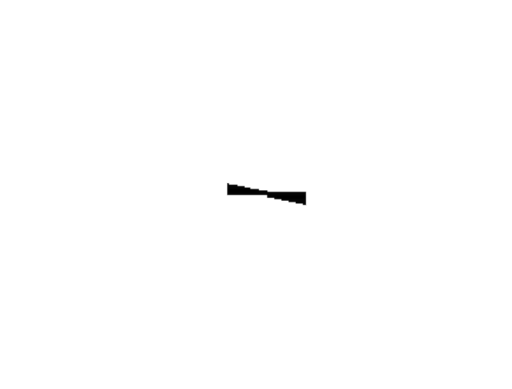

In [ ]:
img = Dilate(((image)))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.savefig('4.jpg')
plt.show()

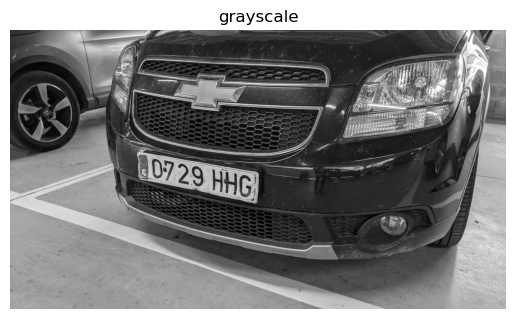

In [ ]:
#8266KPC.jpg
#B9386VX.jpg
#9015KMJ.jpg
#0292LKY.jpg
#0664JGR.jpg
#0182GLK.jpg
#7093HWB.jpg
#6000GVT.jpg
#9892JFR.jpg
# Error 7093HWB.jpg

base = '/home/adri/Desktop/uni/mapsiv/matricules/data/BBDDXR/'
#BBDD_Xavier_Roca-20211010T141813Z-001/BBDD Xavier Roca/7093HWB.jpg
image = read(f"{base}/0729HHG.jpg")

plt.imshow(image, cmap="gray")
plt.axis('off')
plt.title('grayscale')
plt.savefig('4.jpg')
plt.show()

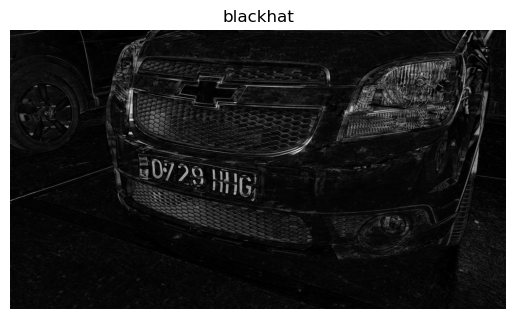

In [ ]:
blackhat =  BlackHat(image)
plt.imshow(blackhat, cmap="gray")
plt.axis('off')
plt.title('blackhat')
plt.savefig('4.jpg')
plt.show()

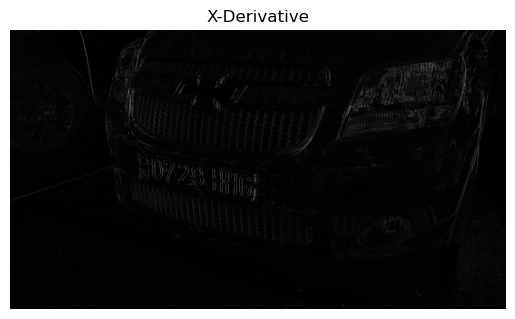

In [ ]:
derivative_X =  Sobel_X(blackhat)
normalized = normalization(derivative_X)
plt.imshow(normalized, cmap="gray")
plt.axis('off')
plt.title('X-Derivative')
plt.savefig('4.jpg')
plt.show()

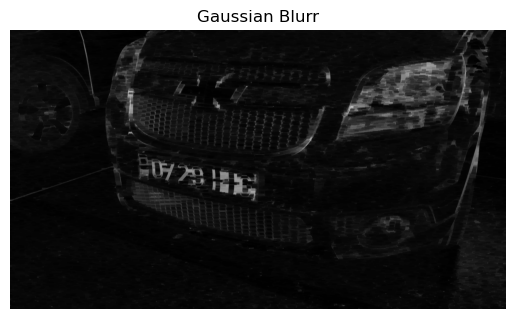

In [ ]:
blurred = GaussianBlur(normalized)
closed = Close(blurred)

plt.imshow(closed, cmap="gray")
plt.axis('off')
plt.title('Gaussian Blurr')
plt.savefig('4.jpg')
plt.show()

<class 'numpy.uint8'>


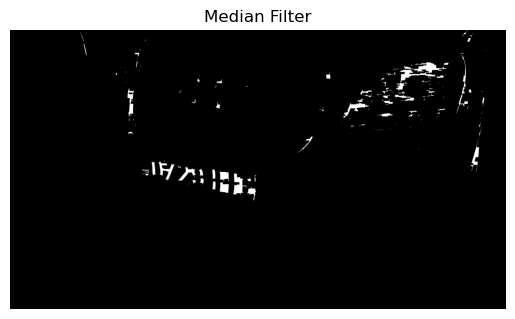

In [ ]:
binary = binarization(closed)
print(type(binary[0][0]))
blurred2 = Median_filter(binary,9)
plt.imshow(binary, cmap="gray")
plt.axis('off')
plt.title('Median Filter')
plt.savefig('5.jpg')
plt.show()

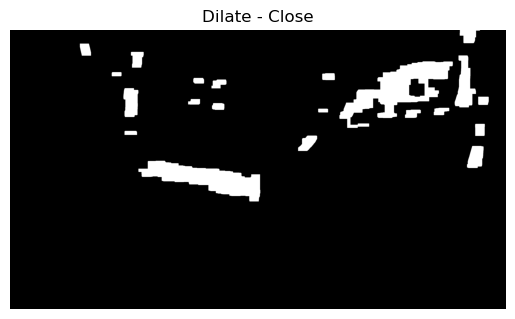

In [ ]:
#final_morphologycal

dilated = Dilate(blurred2)
closed = Close(dilated,cv2.getStructuringElement(cv2.MORPH_RECT, (20, 30)))
plt.imshow(closed, cmap="gray")
plt.axis('off')
plt.title('Dilate - Close')
plt.savefig('4.jpg')
plt.show()

In [ ]:
def filt_contourns(img):
    cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    #cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # return the list of contours
    return cnts


def locate_license_plate(gray, candidates,clearBorder=False):
    # initialize the license plate contour and ROI
    lpCnt = None
    roi = None
    ar_list = []
    maxi = 0
    # loop over the license plate candidate contours
    for c in candidates:
        # compute the bounding box of the contour and then use
        # the bounding box to derive the aspect ratio
        (x, y, w, h) = cv2.boundingRect(c)
        area = cv2.contourArea(c)
        ar = w / float(h)
        ar_list.append((ar, len(c), area))
        if ar > 2.5 and ar < 7:
            if area > maxi:
                maxi = copy.copy(area)
                # store the license plate contour and extract the
                # license plate from the grayscale image and then
                # threshold it
                lpCnt = c
                licensePlate = gray[y-25:y + h, x:x + w]
                roi = cv2.threshold(licensePlate, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


    return roi, lpCnt, ar_list


In [ ]:
contourns = filt_contourns(closed)
final, _ , ar_list=  locate_license_plate(image, contourns)
print(sorted(ar_list, reverse=True)[:10])

[(3.090909090909091, 15, 3193.0), (3.003030303030303, 252, 151067.0), (2.6129032258064515, 17, 2372.0), (2.3529411764705883, 18, 2574.0), (2.1555555555555554, 22, 3795.0), (2.1, 44, 5798.0), (1.9253731343283582, 44, 6756.0), (1.9130434782608696, 41, 3745.0), (1.8392857142857142, 30, 5449.0), (1.8363636363636364, 41, 5060.5)]


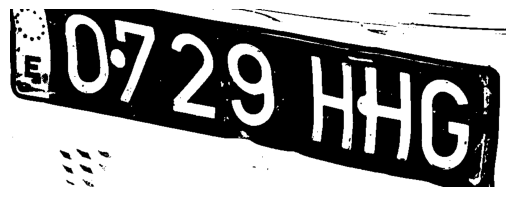

In [ ]:
plt.imshow(final, cmap="gray")
plt.axis('off')
plt.savefig('1.jpg')
plt.show()


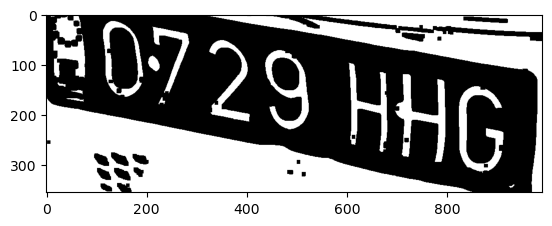

In [ ]:
finale2 = copy.copy(final)
plt.imshow(Erode(finale2, iterations=3), cmap="gray")
plt.show()

In [ ]:
final = copy.copy(Erode(final, iterations=1))

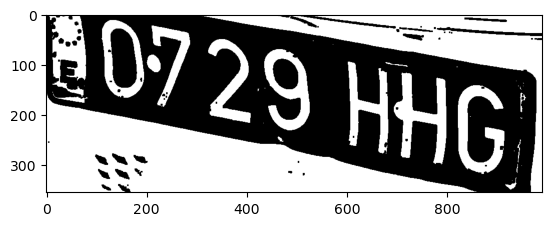

In [ ]:
plt.imshow(final, cmap="gray")
plt.show()

# Convex Hull

In [ ]:
from collections import namedtuple
from skimage.filters import threshold_local
from skimage import segmentation
from skimage import measure
import skimage
from imutils import perspective
import numpy as np
import imutils
import cv2
from scipy import spatial


In [ ]:
# perform a connected components analysis and initialize the mask to store the locations
# of the character candidates
labels = measure.label(final, connectivity=2, background=0)
charCandidates = np.zeros(final.shape, dtype="uint8")

In [ ]:
print(labels)

[[ 0  0  0 ...  2  2  2]
 [ 0  0  0 ...  2  2  2]
 [ 0  0  0 ...  2  2  2]
 ...
 [26 26 26 ...  2  2  2]
 [26 26 26 ...  2  2  2]
 [26 26 26 ...  2  2  2]]


In [ ]:
crops = []
epsilon = 100
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue

# otherwise, construct the label mask to display only connected components for the
# current label, then find contours in the label mask
    labelMask = np.zeros(final.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts =imutils.grab_contours(cnts)

    # ensure at least one contour was found in the mask
    if len(cnts)>0:

        # grab the largest contour which corresponds to the component in the mask, then
        # grab the bounding box for the contour
        c = max(cnts, key=cv2.contourArea)
        (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
        #plt.imshow(final[boxY:+boxH, boxX:boxX+boxW], cmap="gray")
        #plt.show()

        # compute the aspect ratio, solidity, and height ratio for the component
        aspectRatio = boxW / float(boxH)
        solidity = cv2.contourArea(c) / float(boxW * boxH)
        heightRatio = boxH / float(final.shape[0])

    # determine if the aspect ratio, solidity, and height of the contour pass
    # the rules tests
        keepAspectRatio = aspectRatio < 1.0
        keepSolidity = solidity > 0.15
        keepHeight = heightRatio > 0.4 and heightRatio < 0.95

        # check to see if the component passes all the tests
        if keepAspectRatio and keepSolidity and keepHeight:
            # compute the convex hull of the contour and draw it on the character
            # candidates mask

            #crops.append(final[boxY:+boxH+epsilon, boxX:boxX+boxW])
            hull = cv2.convexHull(c)
            rect = list(cv2.minAreaRect(hull))

            '''
            box = cv2.boxPoints(rect)
            box = np.int0(box)

            width = int(rect[1][0])
            height = int(rect[1][1])

            src_pts = box.astype("float32")

            dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

            M = cv2.getPerspectiveTransform(src_pts, dst_pts)

            # directly warp the rotated rectangle to get the straightened rectangle
            warped = cv2.warpPerspective(final, M, (width, height))
            warped = np.rot90(np.rot90(np.rot90(warped)))

            crops.append(warped)

            plt.imshow(warped)
            plt.show()

            '''



            cv2.drawContours(charCandidates, [hull], -1, 255, -1)
print(final.dtype)

uint8


In [ ]:
SHAPE = (100, 200)
def clean_crops(crops):
    if len(crops) == 8:
        crops = crops[::-1][1:]
    return [(cv2.resize(x, SHAPE) == 0) for x in crops]

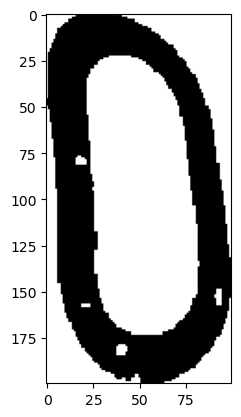

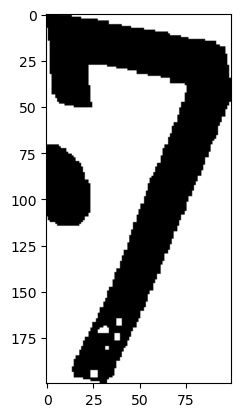

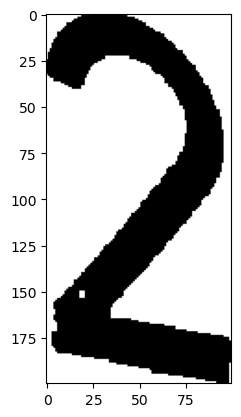

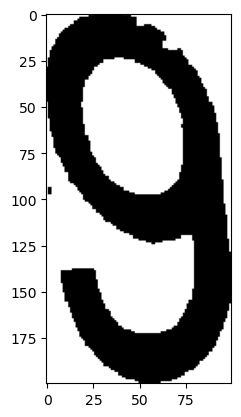

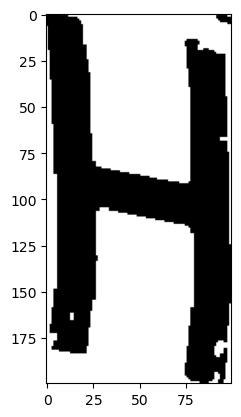

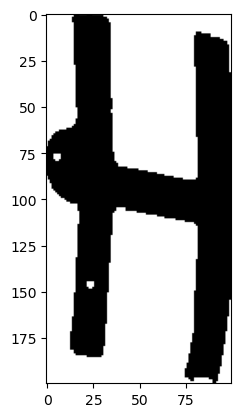

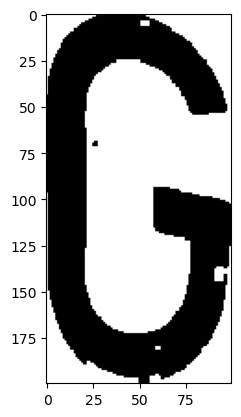

In [ ]:
countors = filt_contourns(charCandidates)
countors = sorted(countors, key=lambda x:x[0][0][0], reverse=True)
crops = []
for image in countors:
    x,y,w,h = cv2.boundingRect(image)
    roi = final[y:y+h,x:x+w]
    crops.append(roi)
crops = clean_crops(crops)
for i in crops:
    plt.imshow(i, cmap='gray')
    plt.show()

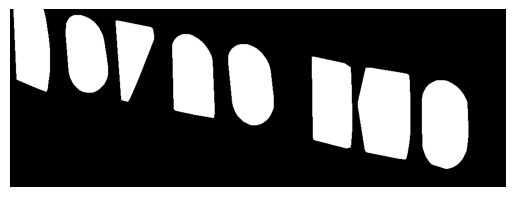

In [ ]:
plt.imshow(charCandidates, cmap="gray")
plt.axis('off')
plt.savefig('2.jpg')
plt.show()

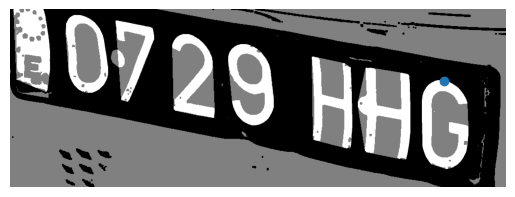

In [ ]:

for n in range(hull.shape[1]):
    plt.scatter(hull[n, :, 0], hull[n, :, 1])
plt.imshow(charCandidates*0.5+final*0.5, cmap="gray")
plt.axis('off')
plt.savefig('x.jpg')
plt.show()

In [ ]:
hull.shape

(46, 1, 2)

In [ ]:
crops[0].max()

True

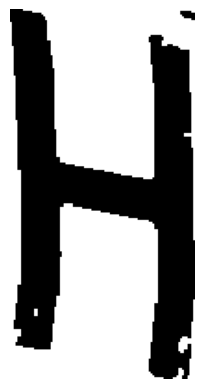

In [ ]:
plt.imshow(crops[4], cmap = 'gray')
plt.axis('off')
plt.savefig('5.jpg')
plt.show()

In [ ]:
gt_folder_letters = '/home/adri/Desktop/uni/mapsiv/matricules/data/gt/Letters/'
gt_folder_numbers = '//home/adri/Desktop/uni/mapsiv/matricules/data/gt/Numbers/'

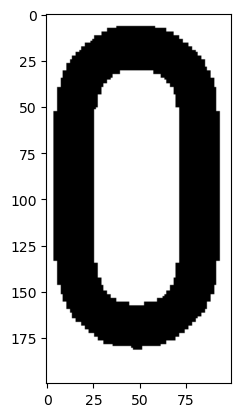

In [ ]:
plt.imshow(cv2.resize(read(gt_folder_numbers + '0.png'), (100, 200)) != 0, cmap = 'gray')
plt.show()

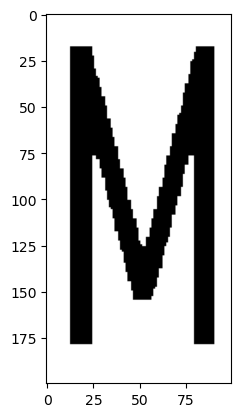

In [ ]:
plt.imshow(cv2.resize(read(gt_folder_letters + 'M.png'), (100, 200)) != 0, cmap = 'gray')
plt.show()

# Data Augmentation

In [ ]:
import random
from skimage.transform import rotate
def vertical_flip(image):
    return cv2.flip(image, 0)

# NO té sentit
def horizontal_flip(image):
    return cv2.flip(image, 1)

def image_dilate(img, kernel=np.ones((3,3), np.uint8), iterations=1):
    return cv2.dilate(img,kernel,iterations = iterations)

def image_translation(image):
    inverse = image.max() - image
    shift_X = random.randint(-10,10)
    shift_Y = random.randint(-10,10)
    M = np.float32([[1, 0, shift_X], [0, 1, shift_Y]])
    translated = cv2.warpAffine(inverse, M, (inverse.shape[1], inverse.shape[0]))
    return translated.max() - translated

def image_rotation(image):
    inverse = image.max() - image
    degrees = random.randint(-40,40)
    (h, w) = inverse.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), degrees, 1.0)
    result = cv2.warpAffine(inverse, M, (w, h))
    return result.max() - result

def image_crop(image):
    scale = 0.8+0.2*random.random()
    height, width = int(image.shape[0]*scale), int(image.shape[1]*scale)
    x = random.randint(0, image.shape[1] - int(width))
    y = random.randint(0, image.shape[0] - int(height))
    cropped = image[y:y+height, x:x+width]
    return cv2.resize(cropped, (image.shape[1], image.shape[0]))



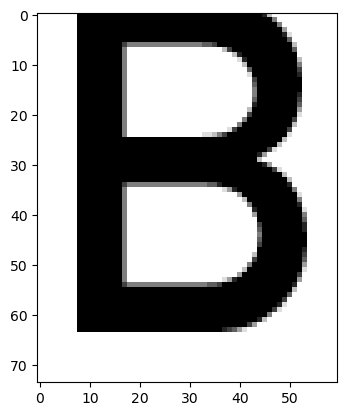

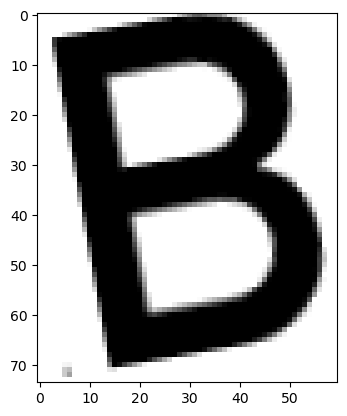

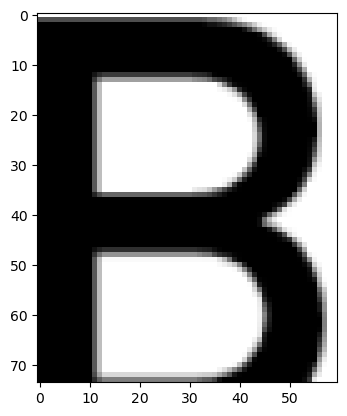

In [ ]:
#gt_folder_letters = '/home/jan/Escritorio/Uni/4t/MAPSIV/Groundtruth/Letters/'
#gt_folder_numbers = '/home/jan/Escritorio/Uni/4t/MAPSIV/Groundtruth/Numbers/'
gt_folder_letters

image_B = read(gt_folder_letters+"B.png")

image_B_translated = image_translation(image_B)
plt.imshow(image_B_translated, cmap ='gray')
plt.show()

image_B_rotated = image_rotation(image_B)
plt.imshow(image_B_rotated, cmap ='gray')
plt.show()

image_B_cropped = image_crop(image_B)
plt.imshow(image_B_cropped, cmap ='gray')
plt.show()



In [ ]:
def apply_random_seq(image):
    funcs = [image_rotation, image_translation, image_crop, image_dilate]
    num = random.randint(1,3)
    funcs = random.sample(funcs, num)
    for func in funcs:
        image = func(image.astype(np.uint8))
    return image

#'''
letter_list = [cv2.resize(read(gt_folder_letters + x), SHAPE) != 0 for x in os.listdir(gt_folder_letters)]
number_list = [cv2.resize(read(gt_folder_numbers + x), SHAPE) != 0 for x in os.listdir(gt_folder_numbers)]

for x, letter in zip(letter_list,os.listdir(gt_folder_letters)):
    for count in range(500):
        modified = apply_random_seq(x)
        cv2.imwrite(gt_folder_letters+letter[0]+'.'+str(count)+'.png', modified*255)

for x, number in zip(number_list,os.listdir(gt_folder_numbers)):
    for count in range(500):
        modified = apply_random_seq(x)
        cv2.imwrite(gt_folder_numbers+number[0]+'.'+str(count)+'.png', modified*255)
#'''

# Feature Extraction

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_order
import numpy as np
import tensorflow as tf
with tf.device('/device:GPU:0'):
    tf_SHAPE = (100, 200, 3)
    base_model = tf.keras.applications.MobileNetV2(input_shape=tf_SHAPE,
                                  include_top=False,
                                  weights='imagenet')

def img_featuring(img):
    a = 1-img
    whites = np.zeros(50)
    for x in range(len(whites)):
        for i in range(SHAPE[1]//10+((x%10)*20)-20, SHAPE[1]//10+((x%10)*20)):
            for j in range(SHAPE[0]//5+((x//10)*20)-20, SHAPE[0]//5+((x//10)*20)):
                whites[x] += a[i][j]
    return whites

features = lambda x: np.concatenate([#x.reshape(-1)
                                     #img_featuring(x)
                                    base_model(np.stack([x,x,x]).reshape(1,100,200,3)).numpy().reshape(-1)
                                    ])


In [ ]:
gtFeatures_letters = {x.split('.')[0]: (features(cv2.resize(read(gt_folder_letters + x), SHAPE) != 0)) for x in os.listdir(gt_folder_letters)}
gtFeatures_numbers = {x.split('.')[0]: (features(cv2.resize(read(gt_folder_numbers + x), SHAPE) != 0)) for x in os.listdir(gt_folder_numbers)}

In [ ]:
result_letters = ''.join([min(gtFeatures_letters, key = lambda x: spatial.distance.cosine(gtFeatures_letters[x], features(y))) for y in crops[:3]])
result_numbers = ''.join([min(gtFeatures_numbers, key = lambda x: spatial.distance.cosine(gtFeatures_numbers[x], features(y))) for y in crops[3:]])

In [ ]:
reverse = lambda x: ''.join(list(reversed(list(x))))
reverse(result_numbers)+reverse(result_letters)

'6209VTG'

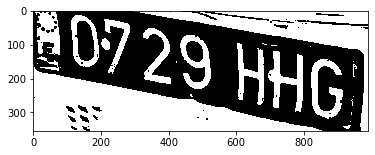

In [ ]:
plt.imshow(final, cmap = 'gray')
plt.show()

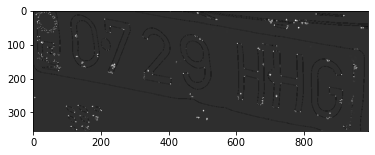

In [ ]:
plt.imshow(cv2.cornerHarris(final.astype(np.uint8),5,5,0.04), cmap = 'gray')
plt.show()

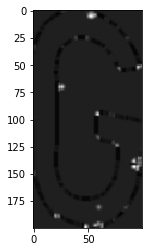

In [ ]:
plt.imshow(cv2.cornerHarris(crops[6].astype(np.uint8),5,5,0.04), cmap = 'gray')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

with tf.device('/device:GPU:0'):

    letter_list = [(features(cv2.resize(read(gt_folder_letters + x), SHAPE) != 0),x[0]) for x in os.listdir(gt_folder_letters)]

    X_letters = [x[0] for x in letter_list]
    y_letters = [x[1] for x in letter_list]

    number_list = [(features(cv2.resize(read(gt_folder_numbers + x), SHAPE) != 0),x[0]) for x in os.listdir(gt_folder_numbers)]
    X_numbers = [x[0] for x in number_list]
    y_numbers = [x[1] for x in number_list]

    letters_classifier_KNN = KNeighborsClassifier(n_neighbors=10)
    letters_classifier_KNN.fit(X_letters, y_letters)

    numbers_classifier_KNN = KNeighborsClassifier(n_neighbors=10)
    numbers_classifier_KNN.fit(X_numbers, y_numbers)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#letters_classifier_SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#letters_classifier_SVC.fit(X_letters, y_letters)

#letters_classifier_SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#letters_classifier_SVC.fit(X_numbers, y_numbers)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#letters_classifier_NB = GaussianNB()
#letters_classifier_NB.fit(X_letters, y_letters)

#letters_classifier_NB = GaussianNB()
#letters_classifier_NB.fit(X_numbers, y_numbers)

In [ ]:
letters = [features(x) for x in crops[4:]]
numbers = [features(x) for x in crops[:4]]
letters_classifier_KNN.predict(letters)
numbers_classifier_KNN.predict(numbers)

array(['0', '7', '2', '9'], dtype='<U1')

In [ ]:
def predict_image(filename, letters_classifier, numbers_classifier):
    base = '/home/jan/Escritorio/Uni/4t/MAPSIV/BBDD_Xavier/'
    img_base = read(base+filename)
    img = BlackHat(img_base)
    img = Sobel_X(img)
    img = normalization(img)
    img = GaussianBlur(img)
    img = Close(img)
    img = binarization(img)
    img = Median_filter(img,9)
    img = Dilate(img)
    img = Close(img,cv2.getStructuringElement(cv2.MORPH_RECT, (20, 30)))
    contourns = filt_contourns(img)
    final, _ , ar_list = locate_license_plate(img_base, contourns)
    final = copy.copy(Erode(final, iterations=1))
    labels = measure.label(final, connectivity=2, background=0)
    charCandidates = np.zeros(final.shape, dtype="uint8")
    crops = []
    epsilon = 100
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(final.shape, dtype="uint8")
        labelMask[labels == label] = 255
        cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts =imutils.grab_contours(cnts)
        if len(cnts)>0:
            c = max(cnts, key=cv2.contourArea)
            (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
            aspectRatio = boxW / float(boxH)
            solidity = cv2.contourArea(c) / float(boxW * boxH)
            heightRatio = boxH / float(final.shape[0])
            keepAspectRatio = aspectRatio < 1.0
            keepSolidity = solidity > 0.15
            keepHeight = heightRatio > 0.4 and heightRatio < 0.95
            if keepAspectRatio and keepSolidity and keepHeight:
                hull = cv2.convexHull(c)
                rect = list(cv2.minAreaRect(hull))
                cv2.drawContours(charCandidates, [hull], -1, 255, -1)
    countors = filt_contourns(charCandidates)
    countors = sorted(countors, key=lambda x:x[0][0][0], reverse=True)
    crops = []
    for img in countors:
        x,y,w,h = cv2.boundingRect(img)
        roi = final[y:y+h,x:x+w]
        crops.append(roi)
    crops = clean_crops(crops)

    letters = list(letters_classifier.predict([features(x) for x in crops[4:]]))
    numbers = list(numbers_classifier.predict([features(x) for x in crops[:4]]))
    return ''.join(numbers + letters)

In [ ]:
# 0182GLK.jpg
# 0292LKY.jpg
# 0664JGR.jpg
# 0729HHG.jpg

predict_image("0182GLK.jpg", letters_classifier_KNN, numbers_classifier_KNN)

'0182GLK'

In [ ]:
base = '/home/jan/Escritorio/Uni/4t/MAPSIV/BBDD_Xavier/'

image_list = [x for x in os.listdir(base)]
evitar = []
y_pred = ''
count = 0
TP = 0
truecomp = 0
for x in image_list:
    count += 1
    try:
        y_test = x
        y_pred = predict_image(x, letters_classifier_KNN, numbers_classifier_KNN)
        print(y_test, y_pred)
    except:
        evitar.append(x)
    if y_test.split(".")[0] == y_pred:
        TP +=1
        truecomp +=1
    elif len(y_pred)==7:
        truecomp +=1
print(TP, count, truecomp-len(evitar), TP/count, TP/(truecomp-len(evitar)))

In [ ]:
base = '/home/jan/Escritorio/Uni/4t/MAPSIV/BBDD_Xavier/'

image_list = [x for x in os.listdir(base)]
evitar = []
y_pred = ''
count = 0
TP = 0
for x in image_list:
    count += 1
    try:
        y_test = x
        y_pred = predict_image(x, letters_classifier_SVC, numbers_classifier_SVC)
        print(y_test, y_pred)
    except:
        evitar.append(x)
    if y_test.split(".")[0] == y_pred:
        TP +=1
print(TP, count, TP/count)
print(len(evitar))

In [ ]:
base = '/home/jan/Escritorio/Uni/4t/MAPSIV/BBDD_Xavier/'

image_list = [x for x in os.listdir(base)]
evitar = []
y_pred = ''
count = 0
TP = 0
for x in image_list:
    count += 1
    try:
        y_test = x
        y_pred = predict_image(x, letters_classifier_NB, numbers_classifier_NB)
        print(y_test, y_pred)
    except:
        evitar.append(x)
    if y_test.split(".")[0] == y_pred:
        TP +=1
print(TP, count, TP/count)
print(len(evitar))

In [ ]:
def predict_image(filename, letters_classifier, numbers_classifier):
    base = '/home/jan/Escritorio/Uni/4t/MAPSIV/BBDD_Xavier/'
    img_base = read(base+filename)
    img = BlackHat(img_base)
    img = Sobel_X(img)
    img = normalization(img)
    img = GaussianBlur(img)
    img = Close(img)
    img = binarization(img)
    img = Median_filter(img,9)
    img = Dilate(img)
    img = Close(img,cv2.getStructuringElement(cv2.MORPH_RECT, (20, 30)))
    contourns = filt_contourns(img)
    final, _ , ar_list = locate_license_plate(img_base, contourns)
    final = copy.copy(Erode(final, iterations=1))
    plt.imshow(final, cmap='gray')
    plt.show()
    labels = measure.label(final, connectivity=2, background=0)
    charCandidates = np.zeros(final.shape, dtype="uint8")
    crops = []
    epsilon = 100
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(final.shape, dtype="uint8")
        labelMask[labels == label] = 255
        cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts =imutils.grab_contours(cnts)
        if len(cnts)>0:
            c = max(cnts, key=cv2.contourArea)
            (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
            aspectRatio = boxW / float(boxH)
            solidity = cv2.contourArea(c) / float(boxW * boxH)
            heightRatio = boxH / float(final.shape[0])
            keepAspectRatio = aspectRatio < 1.0
            keepSolidity = solidity > 0.15
            keepHeight = heightRatio > 0.4 and heightRatio < 0.95
            if keepAspectRatio and keepSolidity and keepHeight:
                hull = cv2.convexHull(c)
                rect = list(cv2.minAreaRect(hull))
                cv2.drawContours(charCandidates, [hull], -1, 255, -1)
    countors = filt_contourns(charCandidates)
    countors = sorted(countors, key=lambda x:x[0][0][0], reverse=True)
    crops = []
    for img in countors:
        x,y,w,h = cv2.boundingRect(img)
        roi = final[y:y+h,x:x+w]
        crops.append(roi)
    crops = clean_crops(crops)

    letters = list(letters_classifier.predict([features(x) for x in crops[4:]]))
    numbers = list(numbers_classifier.predict([features(x) for x in crops[:4]]))
    return ''.join(numbers + letters)

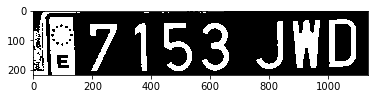

'7153JWD'

In [ ]:
predict_image("7153JWD.jpg", letters_classifier_KNN, numbers_classifier_KNN)

# Validation Verification

In [ ]:
c